## U-Sleep을 통해 얻은 hypnogram을 number로 변환

In [1]:
import os
import str2num_hypno
import pandas as pd
import math
import yasa
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# For the predicted hypnograms
path_subjects = 'D:\\USC\\working_diary\\U-sleep_test' # folder of each subject that contains its predicted hypnogram in string
pre_subjects = os.listdir(path_subjects)
choose_sub = [0, 3, 4, 7]
subjects = []
for idx in choose_sub:
    subjects.append(pre_subjects[idx])
print(subjects)


# For the ground_truth hypnograms
path_InNum_Hypnos = 'D:\\USC\\test_data\\Prepared_InNum_Hypnos'

start_end_time = pd.read_csv('D:\\USC\\code_mine\\U-Sleep_examination\\comparison_start_end_time.csv', index_col=0) 
start_end_time = start_end_time.loc[:][['LE004', 'LE014' ,'LE019', 'LE023']] # select prepared subjects
start_end_time

['LE004', 'LE014', 'LE019', 'LE023']


,LE004,LE014,LE019,LE023
hypno_start_time,0:31:00,0:24:30,0:32:00,0:33:30
hypno_end_time,5:52:00,6:08:00,6:18:30,5:45:00
USleep_start_time,0:18:09,0:20:17,0:29:34,0:21:53
Usleep_end_time,6:35:39,6:09:47,6:33:34,6:12:53


In [2]:
def str2int_time(time_str):
    hour = int(time_str[0])
    minute = int(time_str[2:4])
    second = int(time_str[5:7])
    return hour, minute, second

Now processing: LE004
[Predicted] # of epochs = 756.0
[Ground] # of epochs = 643
The accuracy is 55.054%
Now processing: LE014
[Predicted] # of epochs = 700.0
[Ground] # of epochs = 688
The accuracy is 22.529%
Now processing: LE019
[Predicted] # of epochs = 729.0
[Ground] # of epochs = 694
The accuracy is 35.447%
Now processing: LE023
[Predicted] # of epochs = 703.0
[Ground] # of epochs = 624
The accuracy is 32.853%


,accuracy [%]
LE004,55.054432
LE014,22.529070
LE019,35.446686
LE023,32.852564


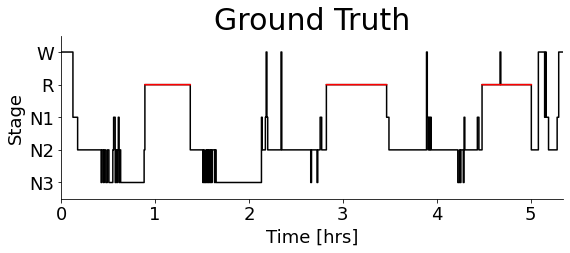

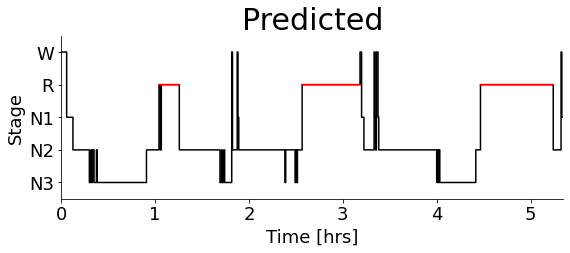

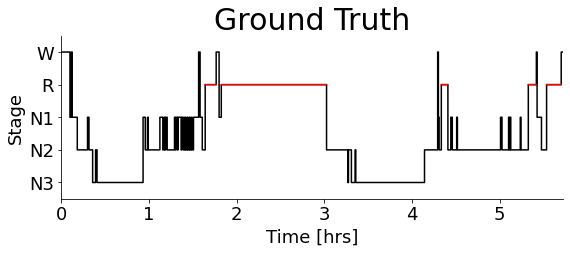

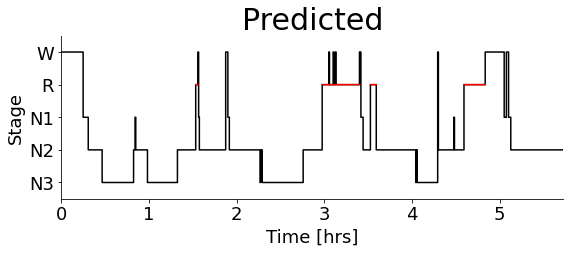

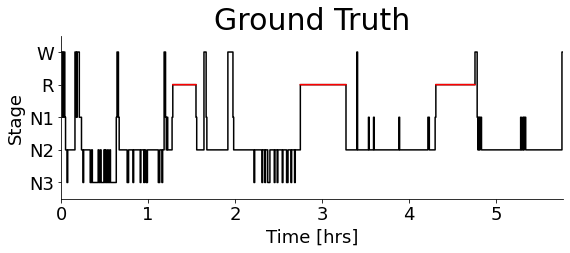

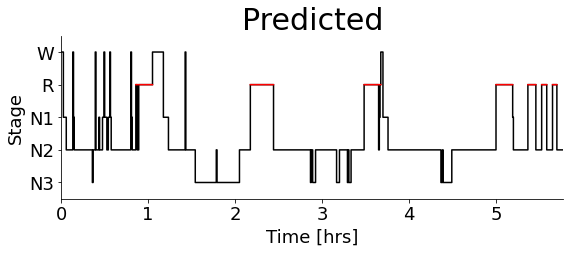

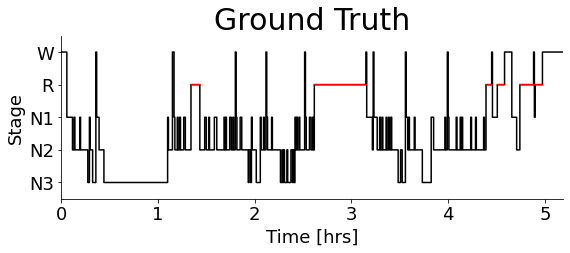

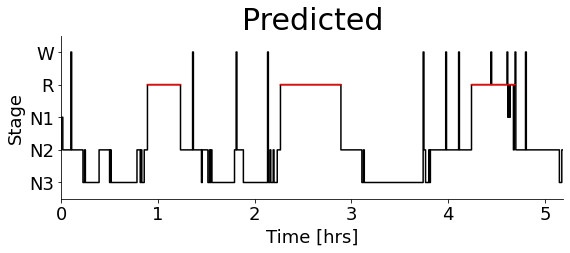

In [8]:
accuracy = []
for subject in subjects:
    print('==========================')
    print(f"Now processing: {subject}")
    
    # load stages
    predicted_stages = str2num_hypno.get_hypnos(subject, path_subjects)
    ground_truth_stages = pd.read_csv(os.path.join(path_InNum_Hypnos, subject+'.csv'))
    
    # get USleep start and end time
    p_h_start = start_end_time.loc['USleep_start_time',:][subject]
    p_h_end = start_end_time.loc['Usleep_end_time',:][subject]
    
    start_hour, start_minute, start_second = str2int_time(p_h_start)
    p_start_time_sec = 3600*start_hour + 60*start_minute + start_second
    
    end_hour, end_minute, end_second = str2int_time(p_h_end)
    p_end_time_sec = 3600*end_hour + 60*end_minute + end_second
    
    # get Ground start and end time
    g_h_start = start_end_time.loc['hypno_start_time',:][subject]
    g_h_end = start_end_time.loc['hypno_end_time',:][subject]
    
    start_hour, start_minute, start_second = str2int_time(g_h_start)
    g_start_time_sec = 3600*start_hour + 60*start_minute + start_second
    
    end_hour, end_minute, end_second = str2int_time(g_h_end)
    g_end_time_sec = 3600*end_hour + 60*end_minute + end_second
    
    # matching
    start_diff = math.floor(abs(g_start_time_sec-p_start_time_sec)/30)
    end_diff = math.floor(abs(g_end_time_sec-p_end_time_sec)/30)
    matched_diff = end_diff+start_diff-1
    matched_predicted_stages_begin = predicted_stages[start_diff:]
    matched_predicted_stages = matched_predicted_stages_begin[0:-end_diff-1]
    
    # before matching
    p_total_seconds = p_end_time_sec - p_start_time_sec
    print('[Predicted] # of epochs = {}'.format(p_total_seconds/30+1))
    print('[Ground] # of epochs = {}'.format(len(ground_truth_stages)))
    #print(f'[Difference] # of epochs = {abs(len(ground_truth_stages)-p_total_seconds/30+1)}')
    
    # after matching
    #print(f'start_diff= {start_diff} seconds')
    #print(f'end_diff= {end_diff} seconds')

    #print(f'# epochs from start_diff= {start_diff} epochs')
    #print(f'# epochs from end_diff= {end_diff} epochs')
    #print(f'[matching; Difference] # of epochs= {matched_diff}')
    #print(f'matching for the begninning part= {len(matched_predicted_stages_begin)}')
    #print(f'matching for the end part= {len(matched_predicted_stages)}')
    
    # show accuracy
    temp_acc = 100*accuracy_score(ground_truth_stages, matched_predicted_stages)
    accuracy.append(temp_acc)
    print(f"The accuracy is {temp_acc:.3f}%")
    
    np_ground = np.array(ground_truth_stages)
    np_ground = np_ground.reshape(np_ground.shape[0])
    np_predicted = np.array(matched_predicted_stages)
    np_predicted = np_predicted.reshape(np_predicted.shape[0])
    np_ground = pd.DataFrame(np_ground)
    np_predicted = pd.DataFrame(np_predicted)
    df_ground = np_ground.loc[:][0]
    df_predicted = np_predicted.loc[:][0]
    
    #fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))
    #ax1.plot()
    yasa.plot_hypnogram(df_ground);
    plt.title('Ground Truth', fontsize=30)
    #ax2.plot()
    yasa.plot_hypnogram(df_predicted);
    plt.title('Predicted', fontsize=30)
accuracy = pd.DataFrame(accuracy)
accuracy.index = subjects
accuracy.columns = ['accuracy [%]']
accuracy

In [ ]:
np1 = np.array(ground_truth_stages)
np1 = np1.reshape(643)

In [ ]:
np_predicted

In [5]:
np_ground.loc[:][0]

0      0
1      0
2      0
3      0
4      0
      ..
638    0
639    0
640    0
641    0
642    0
Name: 0, Length: 643, dtype: int64